In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
print(pd.__version__)

1.1.0


In [2]:
# Import the data
smss_list = glob.glob("../data/abund_data/*.txt")

# List the desired elem and create an empty list
abund_elem = [12.0, 13.0, 14.0, 20.0, 21.1, 24.0, 24.1, 25.0, 26.1, 38.1, 56.1, 63.1, 106.0]
abund_labels = ['[Mg I/Fe]','[Al I/Fe]','[Si I/Fe]','[Ca I/Fe]','[Sc II/Fe]','[Cr I/Fe]','[Cr II/Fe]',
               '[Mn I/Fe]','[Fe II/Fe]','[Sr II/Fe]','[Ba II/Fe]','[Eu II/Fe]','[C/Fe]']
abund_name = []
abund_data = []


for i in range(len(smss_list)):
    # Read the name of the star
    name = smss_list[i][19:-14]
    # Read the abundances [X/Fe] and the total error
    temp_smss = np.genfromtxt(smss_list[i],delimiter=[8,6,4,7,6,7,9,8,9,7,7,7,7,6,9,9,7,7,8,7,6,6,8,7,8,7,7,6],names=True)
    
    # Store them 
    abund_name.append(name)
    abund_data.append(temp_smss)

# disk_name = ['smss1_09_xo', smss1_16_xo, smss1_20_xo, smss1_03_xo, smss21_ana, smss1_12_xo, smss1_07_xo, smss1_24_xo, 
#              smss338_xo, smss343_xo, smss405_xo]
disk_ind = [0,1,-11,10,-3,4,11,-2,-10,17,19]

In [3]:
for i in range(len(disk_ind)):
    print(abund_name[disk_ind[i]])

smss1_09_xo
smss1_16_xo
smss1_20_xo
smss1_03_xo
smss21_ana
smss1_12_xo
smss1_07_xo
smss1_24_xo
smss338_xo
smss343_xo
smss405_xo


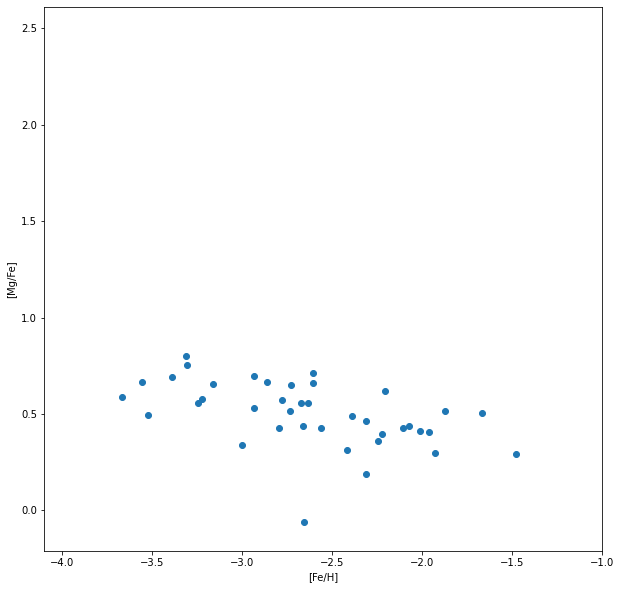

In [4]:
# Try to plot [Mg/Fe]
mgfe_all = []
feh_all = []
for i in range(len(smss_list)):
    mgfe_ind = np.where(abund_data[i]['species'] == 12.)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    mgfe_temp = abund_data[i][mgfe_ind][-2]
    feh_temp = abund_data[i][feh_ind][-9]
    mgfe_all.append(mgfe_temp)
    feh_all.append(feh_temp)
    
plt.figure(figsize=[10,10])
plt.scatter(feh_all,mgfe_all)
plt.xlim([-4.1,-1])
plt.ylim([-0.21,2.61])
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.show()

In [5]:
# Write a standard function to extract abundances for any given abundances atomic numbers
def get_abund(abund_elem,include_fe=True,specific_list=None):
    all_elem = [ [] for _ in range(len(abund_elem)) ]
    feh_all = []
    if specific_list==None:
        for j in range(len(abund_elem)):
            for i in range(len(smss_list)):
                try:
                    elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[i][elem_ind][-2]
                    all_elem[j].append(elem_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
        if include_fe:
            for i in range(len(smss_list)):
                feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
                feh_temp = abund_data[i][feh_ind][-9]
                feh_all.append(feh_temp)
    else:
        for j in range(len(abund_elem)):
            for i in range(len(specific_list)):
                try:
                    elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[specific_list[i]][elem_ind][-2]
                    all_elem[j].append(elem_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
        if include_fe:
            for i in range(len(specific_list)):
                feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
                feh_temp = abund_data[specific_list[i]][feh_ind][-9]
                feh_all.append(feh_temp)
    
    return all_elem, feh_all

In [6]:
# Extracting final abundances for all stars
all_elem, feh_all = get_abund(abund_elem)

disk_elem, feh_disk = get_abund(abund_elem,specific_list=disk_ind)

In [7]:
print(mgfe_all,all_elem[0])

[0.513, 0.754, 0.664, 0.692, 0.462, 0.665, 0.299, nan, 0.515, 0.559, 0.488, 0.559, 0.428, -0.063, 0.497, 0.438, 0.558, 0.428, 0.436, 0.586, 0.19, 0.711, 0.533, 0.292, 0.398, 0.34, 0.57, 0.429, 0.404, 0.414, 0.697, 0.576, 0.314, 0.653, 0.506, 0.661, 0.648, nan, 0.8, 0.358, 0.62] [0.513, 0.754, 0.664, 0.692, 0.462, 0.665, 0.299, nan, 0.515, 0.559, 0.488, 0.559, 0.428, -0.063, 0.497, 0.438, 0.558, 0.428, 0.436, 0.586, 0.19, 0.711, 0.533, 0.292, 0.398, 0.34, 0.57, 0.429, 0.404, 0.414, 0.697, 0.576, 0.314, 0.653, 0.506, 0.661, 0.648, nan, 0.8, 0.358, 0.62]


In [8]:
def make_plots(N_row,N_col,all_elem,elem_labels,feh_disk=[],disk_elem=[],file_name=None):
    assert N_row*N_col >= len(all_elem)
    f, axs = plt.subplots(N_row,N_col,figsize=[N_col*10,N_row*10])
    
    for i in range(N_row):
        for j in range(N_col):
            if i*N_col+j >= len(all_elem):
                break
            axs[i,j].scatter(feh_all,all_elem[i*N_col+j],s=100)
            axs[i,j].scatter(feh_disk,disk_elem[i*N_col+j],marker='*',c='r',s=100)
            axs[i,j].set_xlim([-4.1,-1])
            axs[i,j].set_ylim([-1.21,1.61])
            axs[i,j].set_xlabel('[Fe/H]',fontsize=24)
            axs[i,j].set_ylabel(elem_labels[i*N_col+j],fontsize=24)
    plt.show()
    
    if file_name != None:
        f.savefig(file_name,bbox='tight')

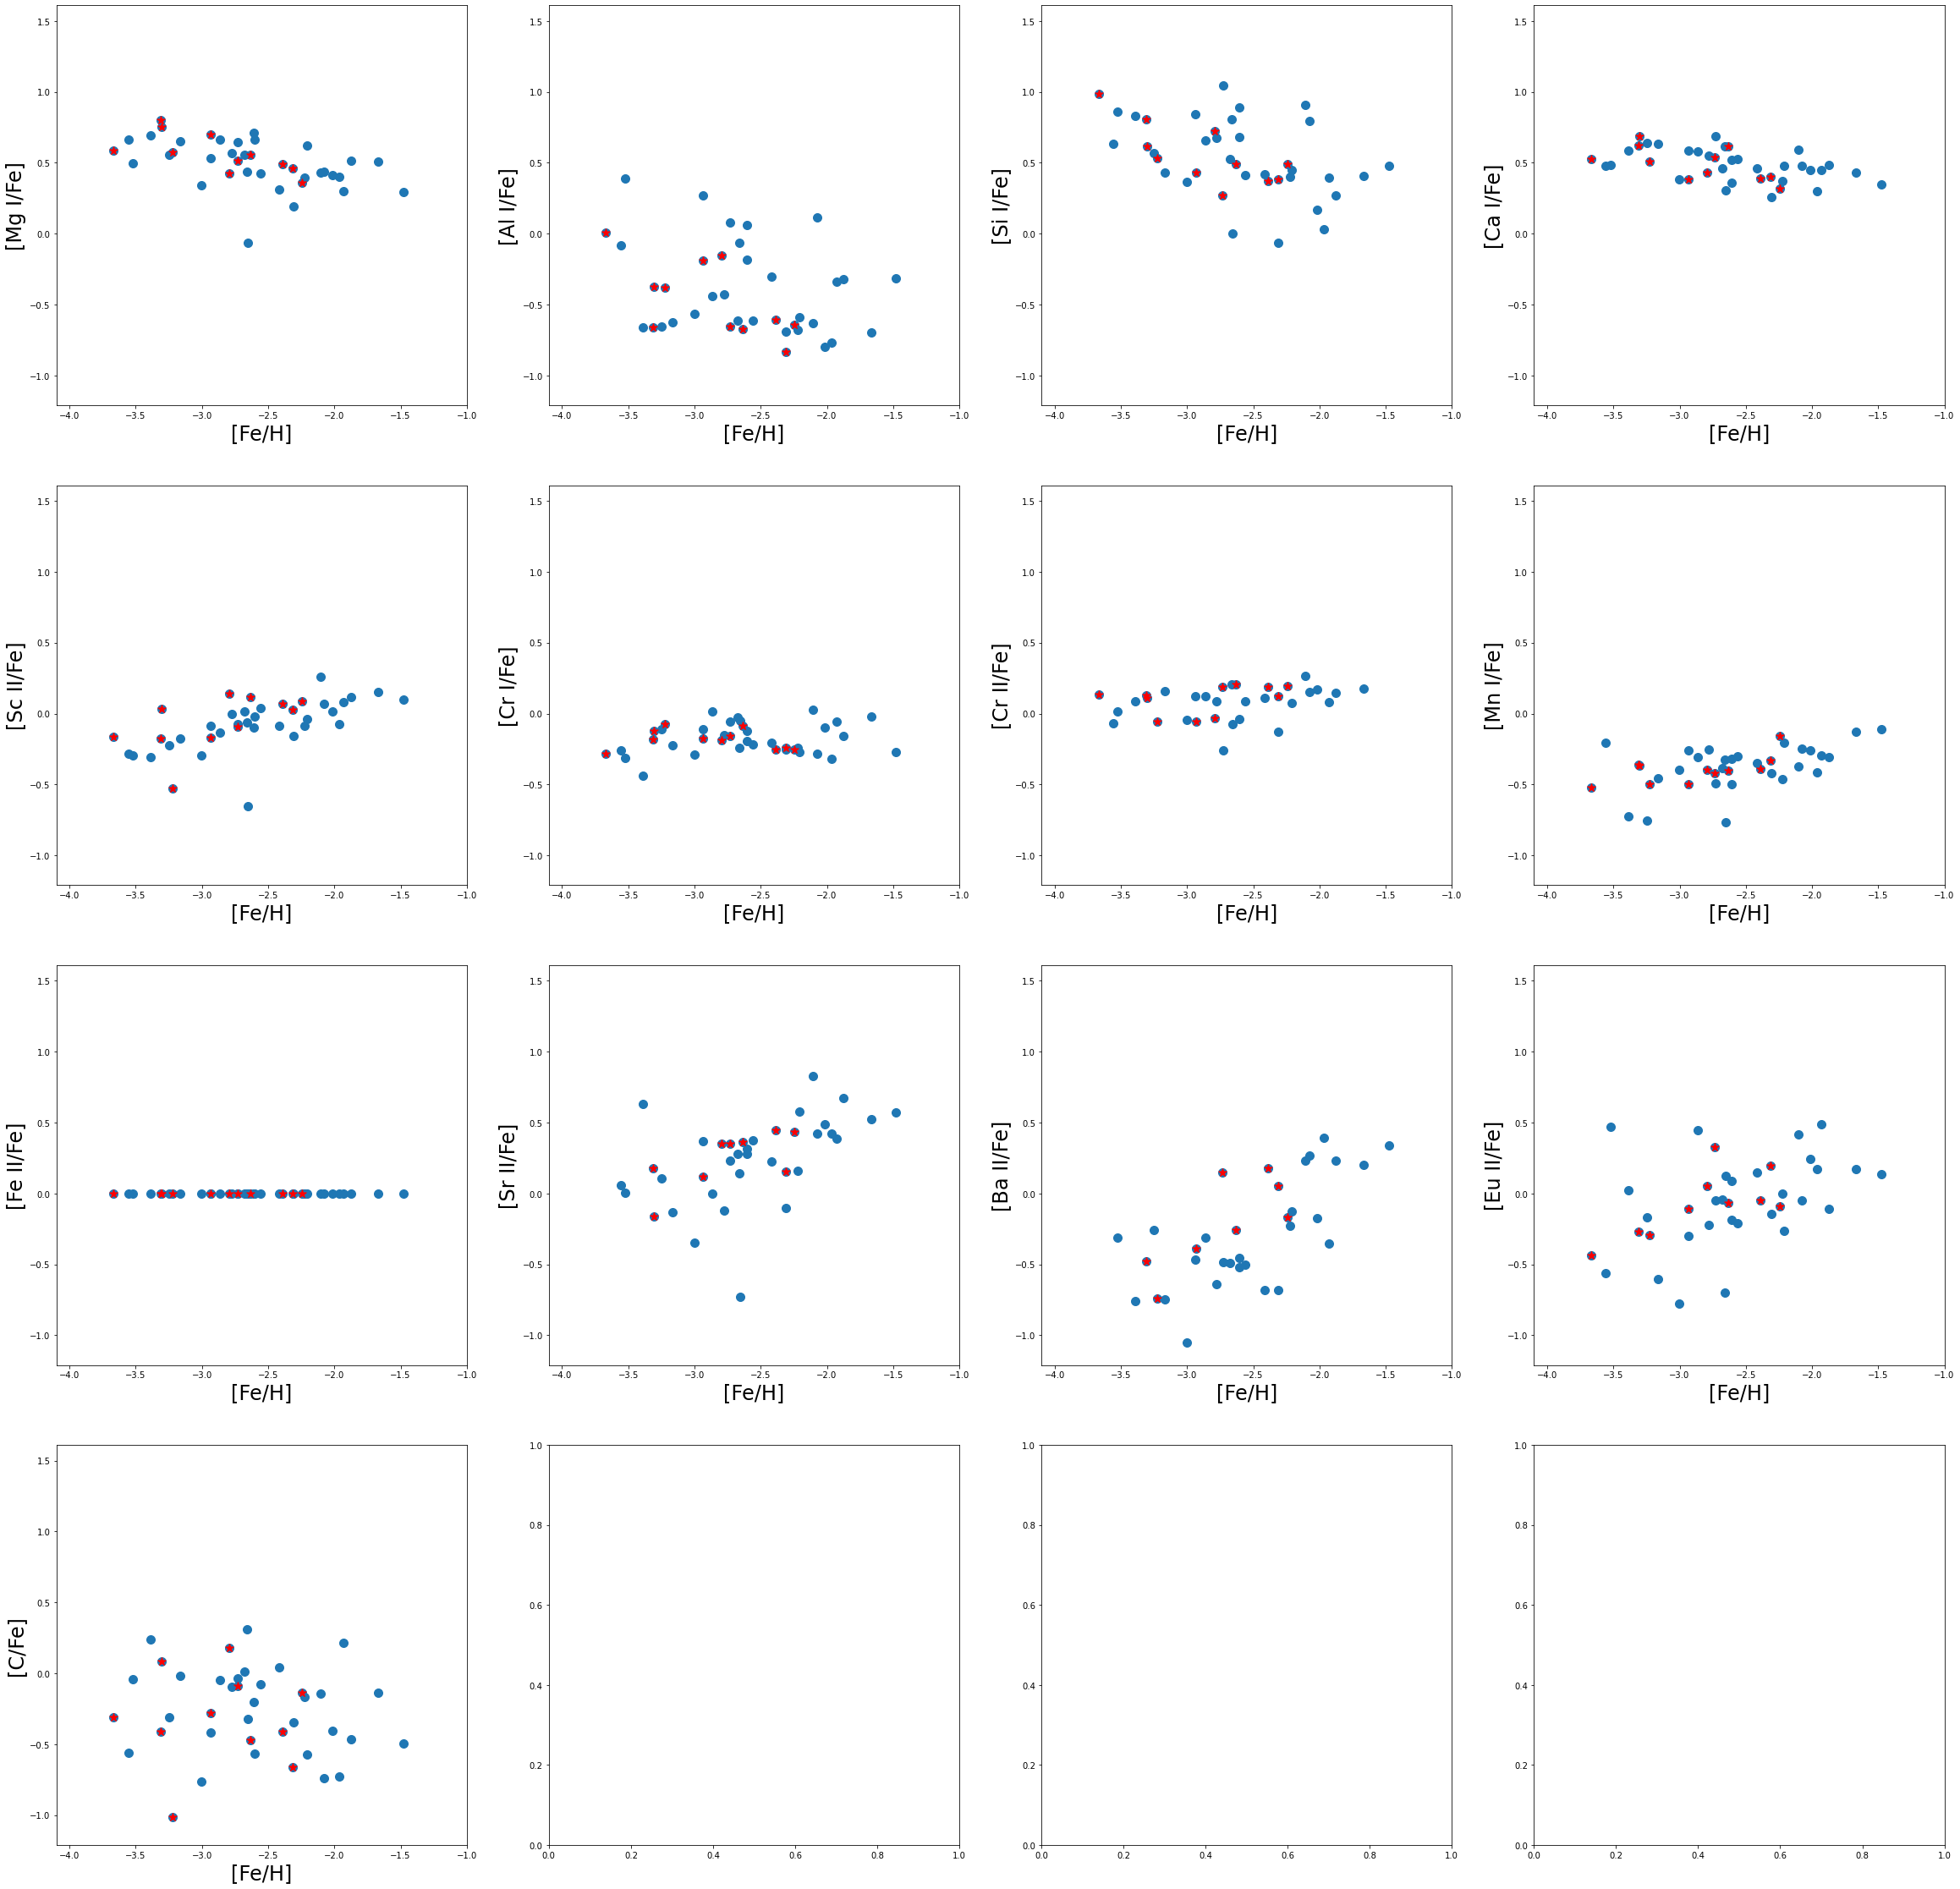

<ipython-input-8-e403fe6b3d33>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig(file_name,bbox='tight')


In [9]:
make_plots(4,4,all_elem,feh_disk=feh_disk,disk_elem=disk_elem,elem_labels=abund_labels,file_name='smss_abund_plots.pdf')

In [10]:
# import the line data for Fe line examination
smss_lines_all = []
smss_lines_name = []

# Read the file names
smss_lines_list = glob.glob("../data/line_data/*")

for i in range(len(smss_lines_list)):
    # Read the name of the star
    name = smss_lines_list[i][18:-6]
    # Read the lines
    temp_smss = pd.read_csv(smss_lines_list[i],delim_whitespace=True).drop([0])
    
    # Store them 
    smss_lines_name.append(name)
    smss_lines_all.append(temp_smss)


In [94]:
# smss_lines_fei_stat.head()
pd.merge(smss_lines_fei[bin_list_ind[0]],smss_lines_fei_stat,on='wavelength')
# smss_lines_name[0]
# smss_lines_all[10].loc[smss_lines_all[10]["species"] == '26.0']
# smss_lines_fei[10].count()[0]
# smss_lines_fei[0]["species"][124]
# pd.concat([smss_lines_fei[0],smss_lines_fei[1]])["species"][124]

,species,wavelength,expot,loggf,EW,logeps,e_logeps,frequency
0,26.0,3805.340,3.300,0.310,104.82,5.494,0.252,36
1,26.0,3949.950,2.180,-1.250,91.64,5.263,0.119,55
2,26.0,4067.980,3.210,-0.530,67.71,5.147,0.048,60
3,26.0,4070.770,3.240,-0.870,54.55,5.254,0.057,35
4,26.0,4114.440,2.830,-1.300,51.22,5.123,0.037,55
...,...,...,...,...,...,...,...,...
181,26.0,6855.160,4.560,-0.490,13.05,5.337,0.065,14
182,26.0,6978.850,2.480,-2.500,31.71,5.321,0.018,42
183,26.0,7495.070,4.220,-0.100,47.57,5.282,0.026,63
184,26.0,7511.020,4.180,0.120,65.79,5.311,0.027,71


In [12]:
# Cut out only the FeI and FeII lines
smss_lines_fei = []
smss_lines_feii = []

for i in range (len(smss_lines_list)):
    # Cut out the fei/feii part
    temp_smss_fei = smss_lines_all[i].loc[smss_lines_all[i]["species"] == '26.0']
    temp_smss_feii = smss_lines_all[i].loc[smss_lines_all[i]["species"] == '26.1']
    
    smss_lines_fei.append(temp_smss_fei)
    smss_lines_feii.append(temp_smss_feii)

In [13]:
# count how many FeI and FeII lines are used for all stars
smss_N_fei = []
smss_N_feii = []

for i in range (len(smss_lines_list)):
    temp_N_fei = smss_lines_fei[i].count()[0]
    temp_N_feii = smss_lines_feii[i].count()[0]
    
    smss_N_fei.append(temp_N_fei)
    smss_N_feii.append(temp_N_feii)

In [109]:
# Find the stars in each teff/metallicity bin
bin_list_name = np.array(['smss15','smss1_15','smss1_29','smss334','smss653','smss728'])
bin_list_ind = []
for i in range(len(bin_list_name)):
    bin_list_ind.append(int(np.where(np.array(smss_lines_name) == bin_list_name[i])[0][0]))
# print(bin_list_ind)
# print(np.array(smss_lines_name)[bin_list_ind],np.array(smss_N_fei)[bin_list_ind],np.array(smss_N_feii)[bin_list_ind])

# Pick out the Fe lines of these stars
# And merge the frequencies to the lines for later use
bin_lines_fei = []
bin_lines_feii = []

for i in range(len(bin_list_name)):
    bin_lines_fei.append(pd.merge(smss_lines_fei[bin_list_ind[i]],smss_lines_fei_stat,on='wavelength',how='inner'))
    bin_lines_feii.append(pd.merge(smss_lines_feii[bin_list_ind[i]],smss_lines_feii_stat,on='wavelength',how='inner'))

    

# Take out all the lines with frequency less than 25

for i in range(len(bin_list_name)):
    temp_ind = np.where(bin_lines_fei[i]['frequency'].values < 25)[0]
    bin_lines_fei[i] = bin_lines_fei[i].drop(index=temp_ind)
    temp_ind = np.where(bin_lines_feii[i]['frequency'].values < 25)[0]
    bin_lines_feii[i] = bin_lines_feii[i].drop(index=temp_ind)
    

# Take only the lines still present in every stars

for i in range(len(bin_list_name)-1):
    suf0, suf1 = "_"+str(i), "_"+str(i+1)
    if i == 0:
        bins_common_fei_lines = pd.merge(bin_lines_fei[i],bin_lines_fei[i+1],on='wavelength',how='inner',suffixes=(suf0, suf1))
        bins_common_feii_lines = pd.merge(bin_lines_feii[i],bin_lines_feii[i+1],on='wavelength',how='inner',suffixes=(suf0, suf1))
    else:
        bins_common_fei_lines = pd.merge(bins_common_fei_lines,bin_lines_fei[i+1],on='wavelength',how='inner',suffixes=(suf0, suf1))
        bins_common_feii_lines = pd.merge(bins_common_feii_lines,bin_lines_feii[i+1],on='wavelength',how='inner',suffixes=(suf0, suf1))

bins_common_fei_lines_wavelength = bins_common_fei_lines["wavelength"]
bins_common_feii_lines_wavelength = bins_common_feii_lines["wavelength"]

In [114]:
# Print the result
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bins_common_fei_lines_wavelength)
    print(bins_common_feii_lines_wavelength)

0     3949.950
1     4067.980
2     4134.680
3     4147.670
4     4154.500
5     4157.780
6     4174.910
7     4175.640
8     4181.760
9     4191.430
10    4195.330
11    4199.100
12    4222.210
13    4233.600
14    4238.810
15    4250.120
16    4271.150
17    4282.400
18    4352.730
19    4430.610
20    4442.340
21    4447.720
22    4466.550
23    4489.740
24    4494.560
25    4531.150
26    4602.940
27    4733.590
28    4736.770
29    4871.320
30    4872.140
31    4890.760
32    4891.490
33    4918.990
34    4938.810
35    4939.690
36    4994.130
37    5001.860
38    5006.120
39    5068.770
40    5079.740
41    5083.340
42    5123.720
43    5127.360
44    5133.690
45    5166.280
46    5171.600
47    5191.450
48    5192.340
49    5194.940
50    5216.270
51    5232.940
52    5266.560
53    5281.790
54    5283.620
55    5324.180
56    5341.020
57    5367.470
58    5383.370
59    5497.520
60    5501.470
61    5506.780
62    5569.620
63    5586.760
64    5624.540
65    6065.480
66    6136

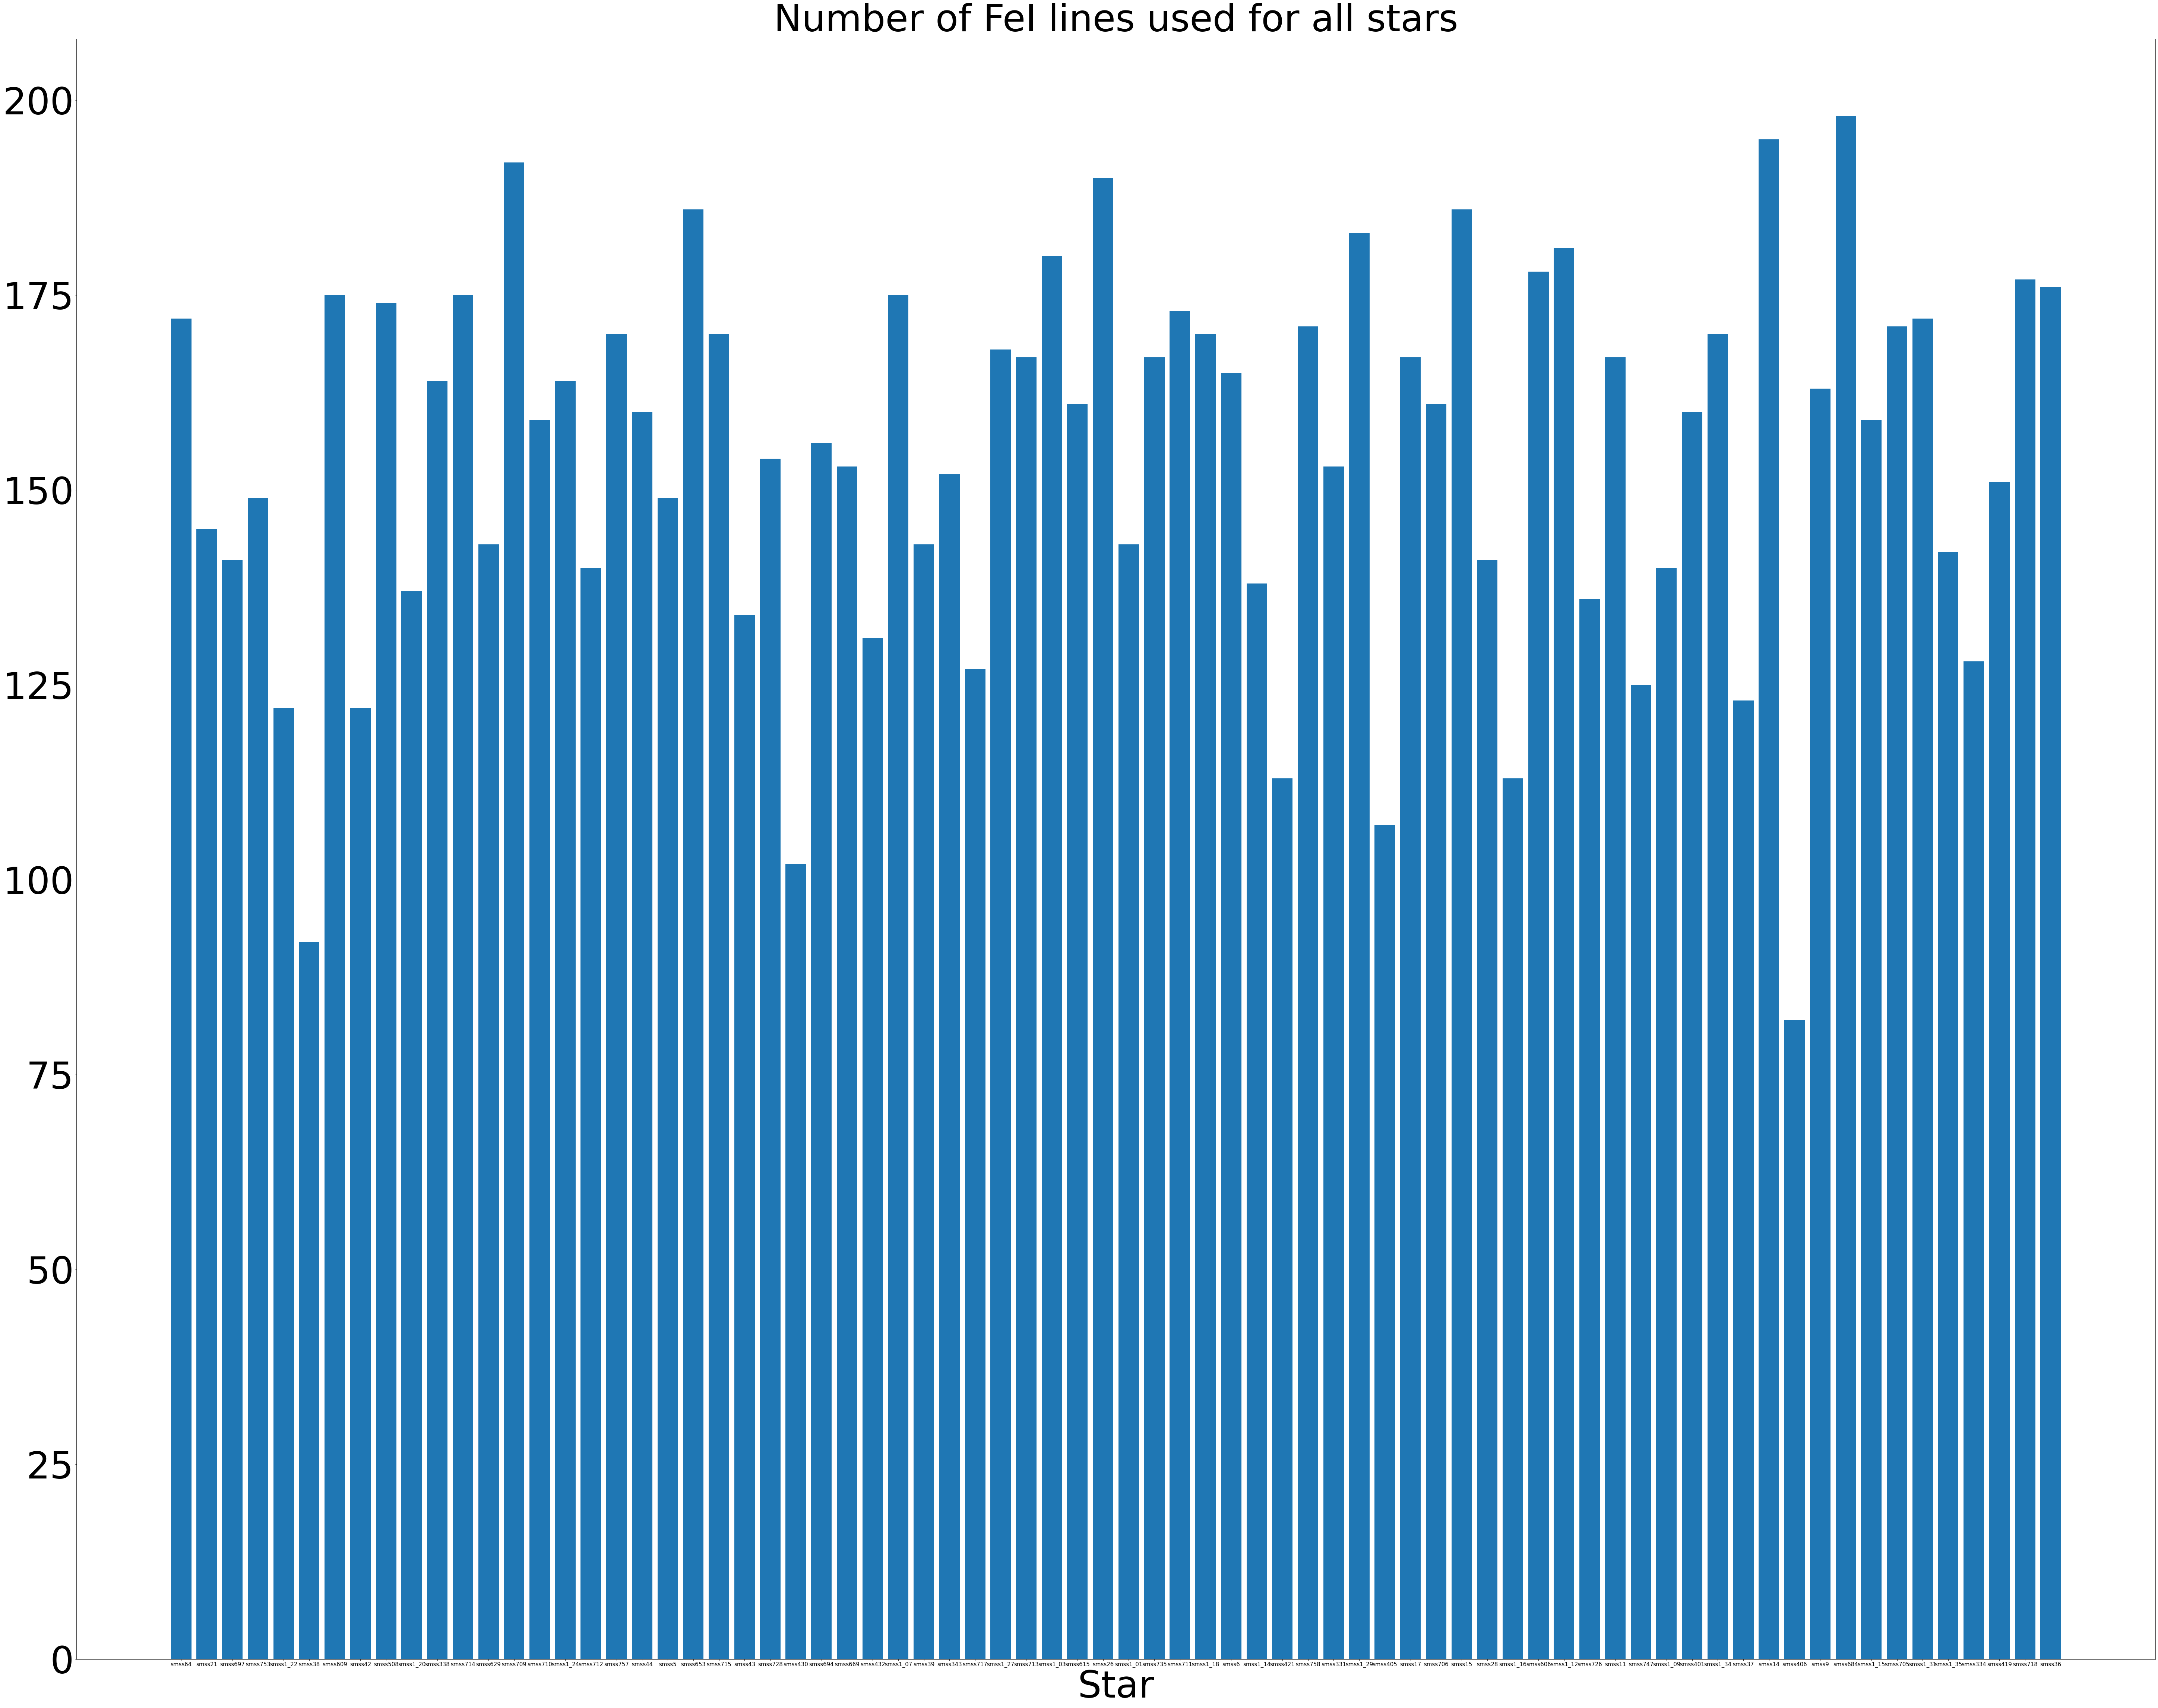

In [14]:
fig, ax = plt.subplots(figsize=[100,80])
x = np.arange(len(smss_lines_list))
ax.tick_params(axis='y', which='major', labelsize=100)
ax.tick_params(axis='y', which='minor', labelsize=80)
ax.tick_params(axis='x', which='major', labelsize=15)
plt.bar(x,smss_N_fei)
plt.xticks(x, smss_lines_name)
plt.title("Number of FeI lines used for all stars",fontsize = 100)
ax.set_xlabel('Star', fontsize=100)
plt.show()

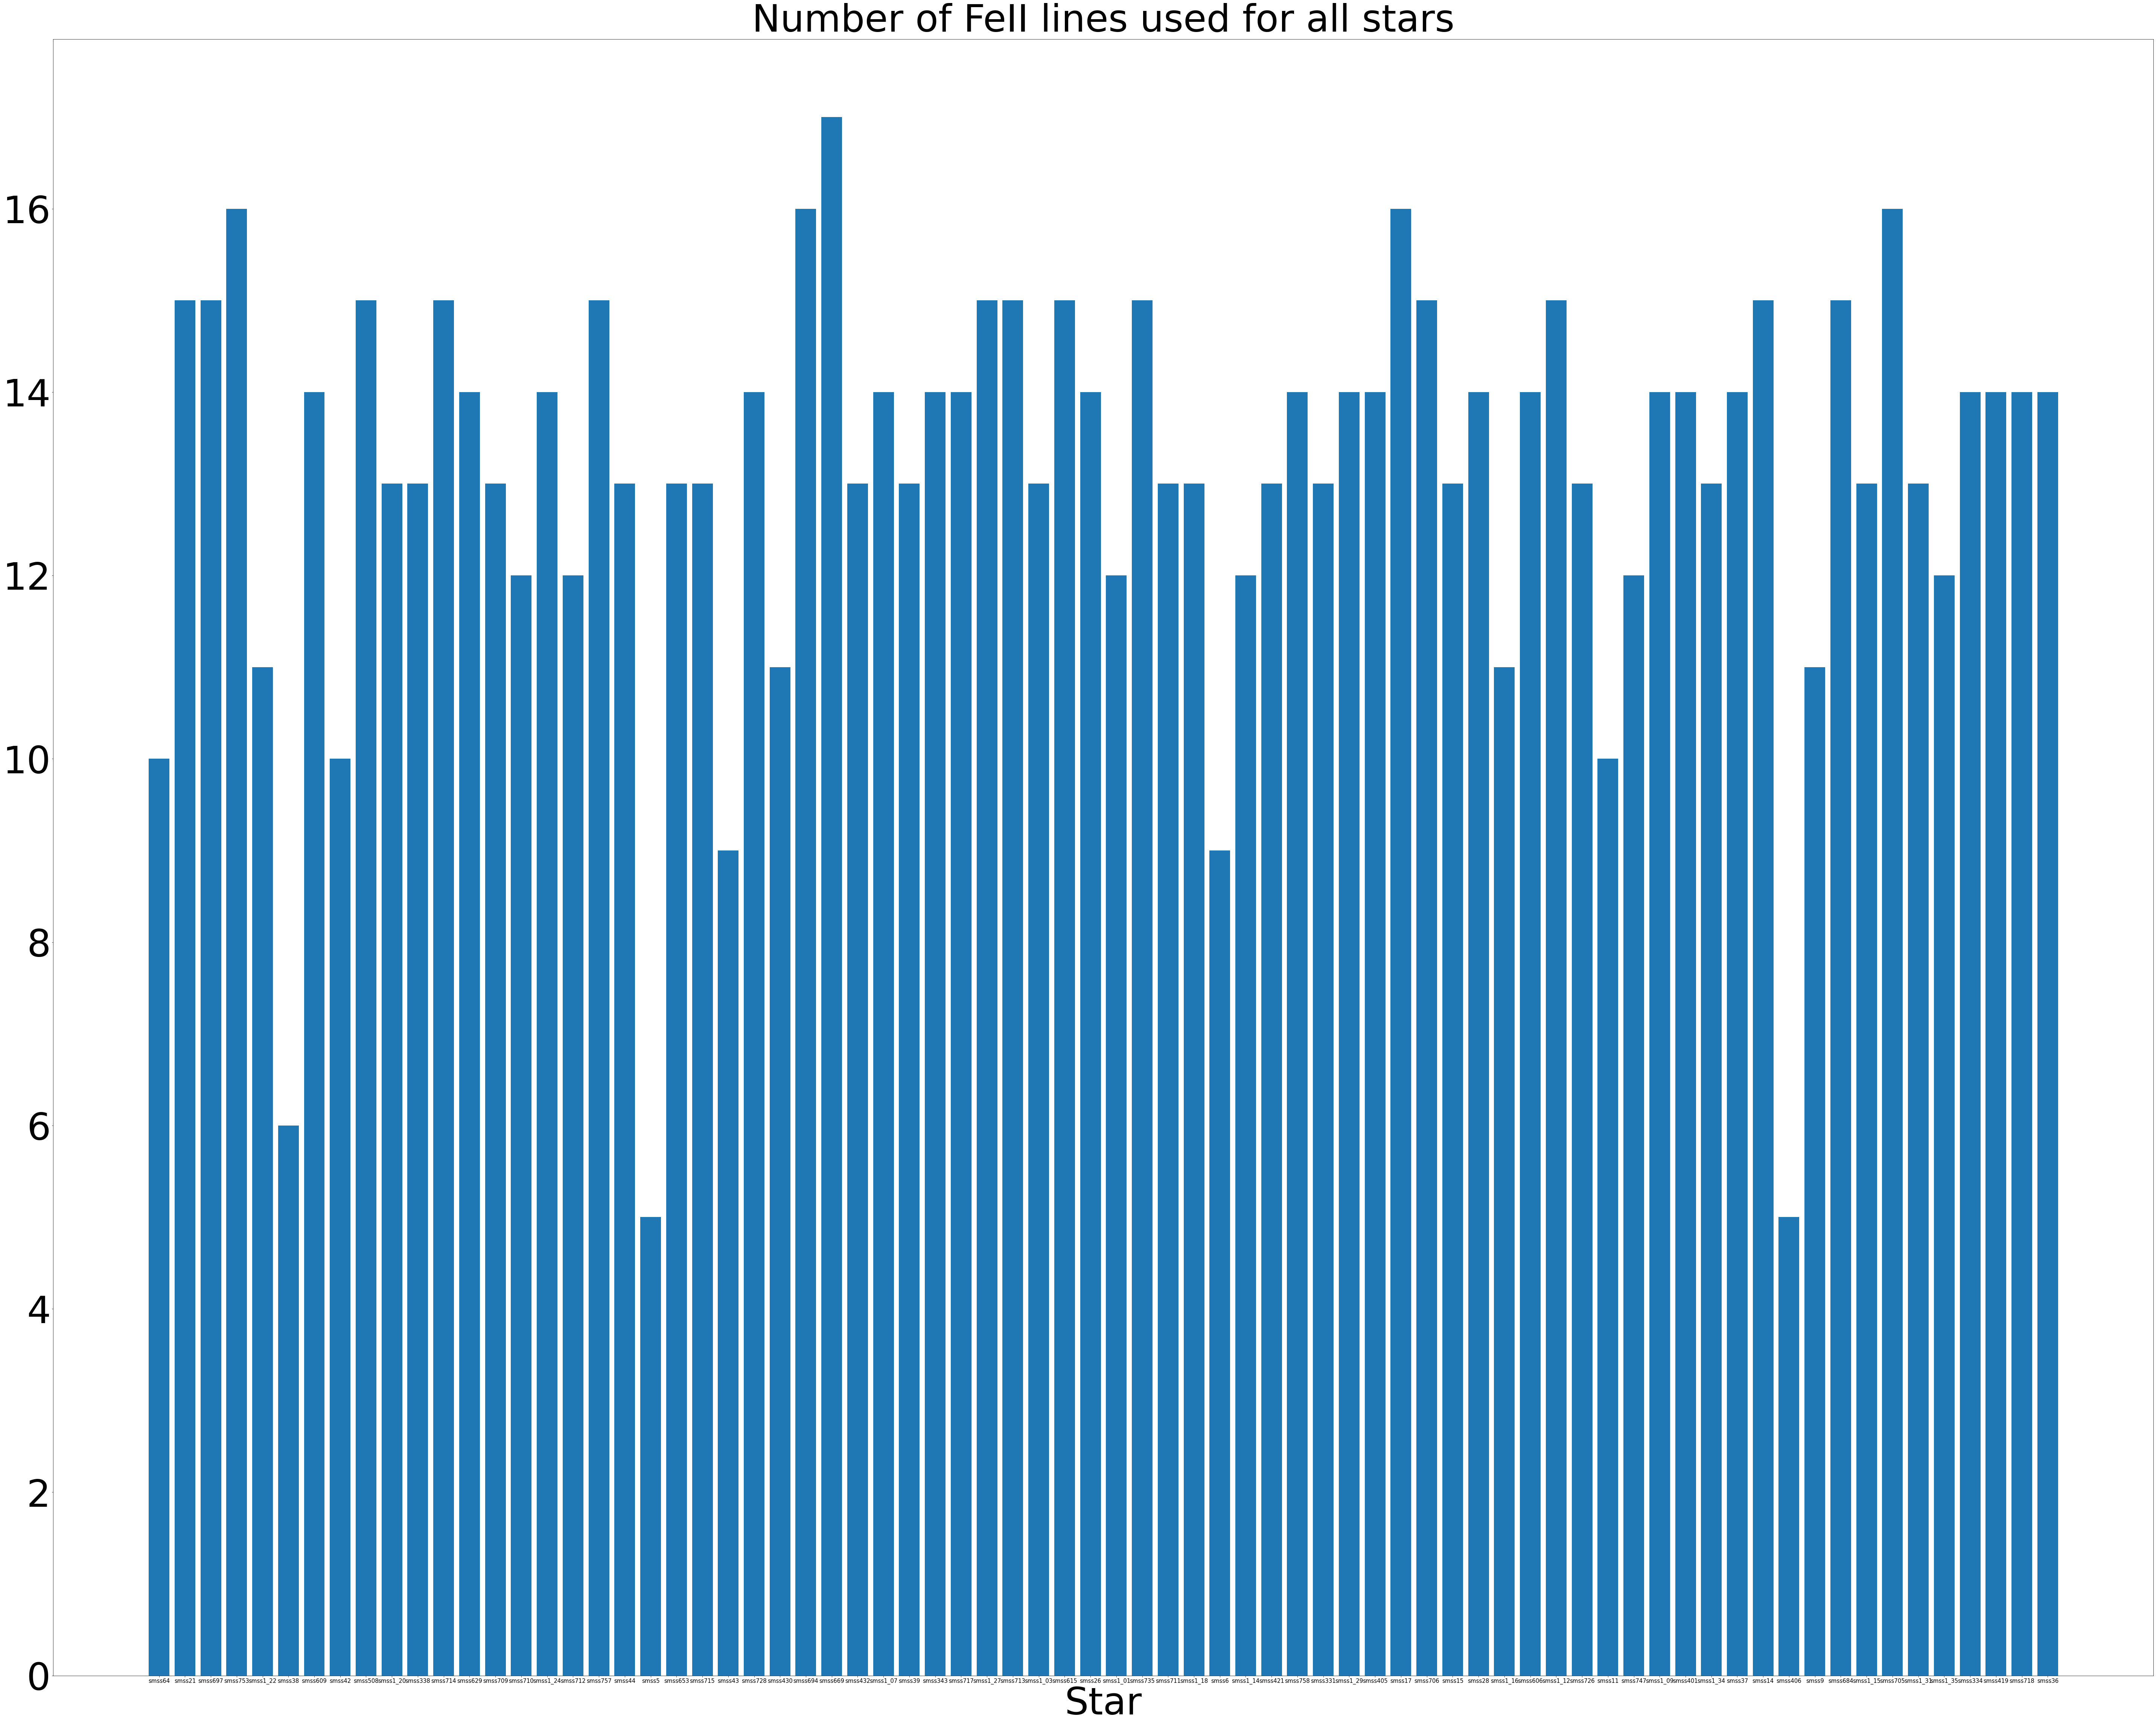

In [15]:
fig, ax = plt.subplots(figsize=[100,80])
x = np.arange(len(smss_lines_list))
ax.tick_params(axis='y', which='major', labelsize=100)
ax.tick_params(axis='y', which='minor', labelsize=80)
ax.tick_params(axis='x', which='major', labelsize=15)
plt.bar(x,smss_N_feii)
plt.xticks(x, smss_lines_name)
plt.title("Number of FeII lines used for all stars",fontsize = 100)
ax.set_xlabel('Star', fontsize=100)
plt.show()

In [93]:
# Count how frequently each line appeared
# First merge all stars' fei/feii lines together
smss_lines_fei_merged = pd.concat(smss_lines_fei)
smss_lines_feii_merged = pd.concat(smss_lines_feii)

# count the lines
smss_lines_fei_stat = smss_lines_fei_merged.value_counts(subset=["wavelength"])
smss_lines_feii_stat = smss_lines_feii_merged.value_counts(subset=["wavelength"])

# Name the series
smss_lines_fei_stat = smss_lines_fei_stat.rename('frequency')
smss_lines_feii_stat = smss_lines_feii_stat.rename('frequency')

In [17]:
# Try to sort the lines in wavelength
smss_lines_fei_stat_sorted = smss_lines_fei_stat.sort_index()
smss_lines_feii_stat_sorted = smss_lines_feii_stat.sort_index()

In [51]:
print(smss_lines_fei_stat_sorted.values)
len(np.where(smss_lines_fei_stat_sorted.values > 25)[0])

[ 1  1  2  5  4  1  7  1 15  3 10  1 29 39  9 36 26  3  7  6 10  3  3 12
  9  6  7 26  7  4 55 49 24  1 48  5 60 35  4 55 33 70 31 71 19 67 60 67
 52 69 67 72 40 69 71 64 71 70 70 38 29 44 66 39 73 74 69 48 48 58 11 66
 17 61 43 20 15 40 30 66  1 70 64 71 64 61 46 70 71 20 68 26 63 19 50 67
 44 45 52 53 32 59  8 55  9 65 65 36  1 47  7  6 69 67  6 25 23 71 69  2
 65  8 21 69 70 61 70 71 58 30 66 73 70 21 62 72 57 47 33 13 17  7 69 64
 68 54 68 72 71 72 42 66 44 69 70 72 73 71 69 73 60 71 63 72 63 60 74 37
 30 62 72 73 73 10 65 26 73 68 70 73 56 27 60 67 58  4 11 70 69 69 62 69
 59 70 21  1 73 73 73  3 26 22 72 73  4 68 25 32 12 58 28  8  9 28 32 17
 73 74 73 23 48 74 63 65 74 25 22 65 73 65 32 51  1 42 53 28 34 73 49 68
 72 74 26 72 73 58 29 72 57 10 14  3 42 63 71 20 19]


183

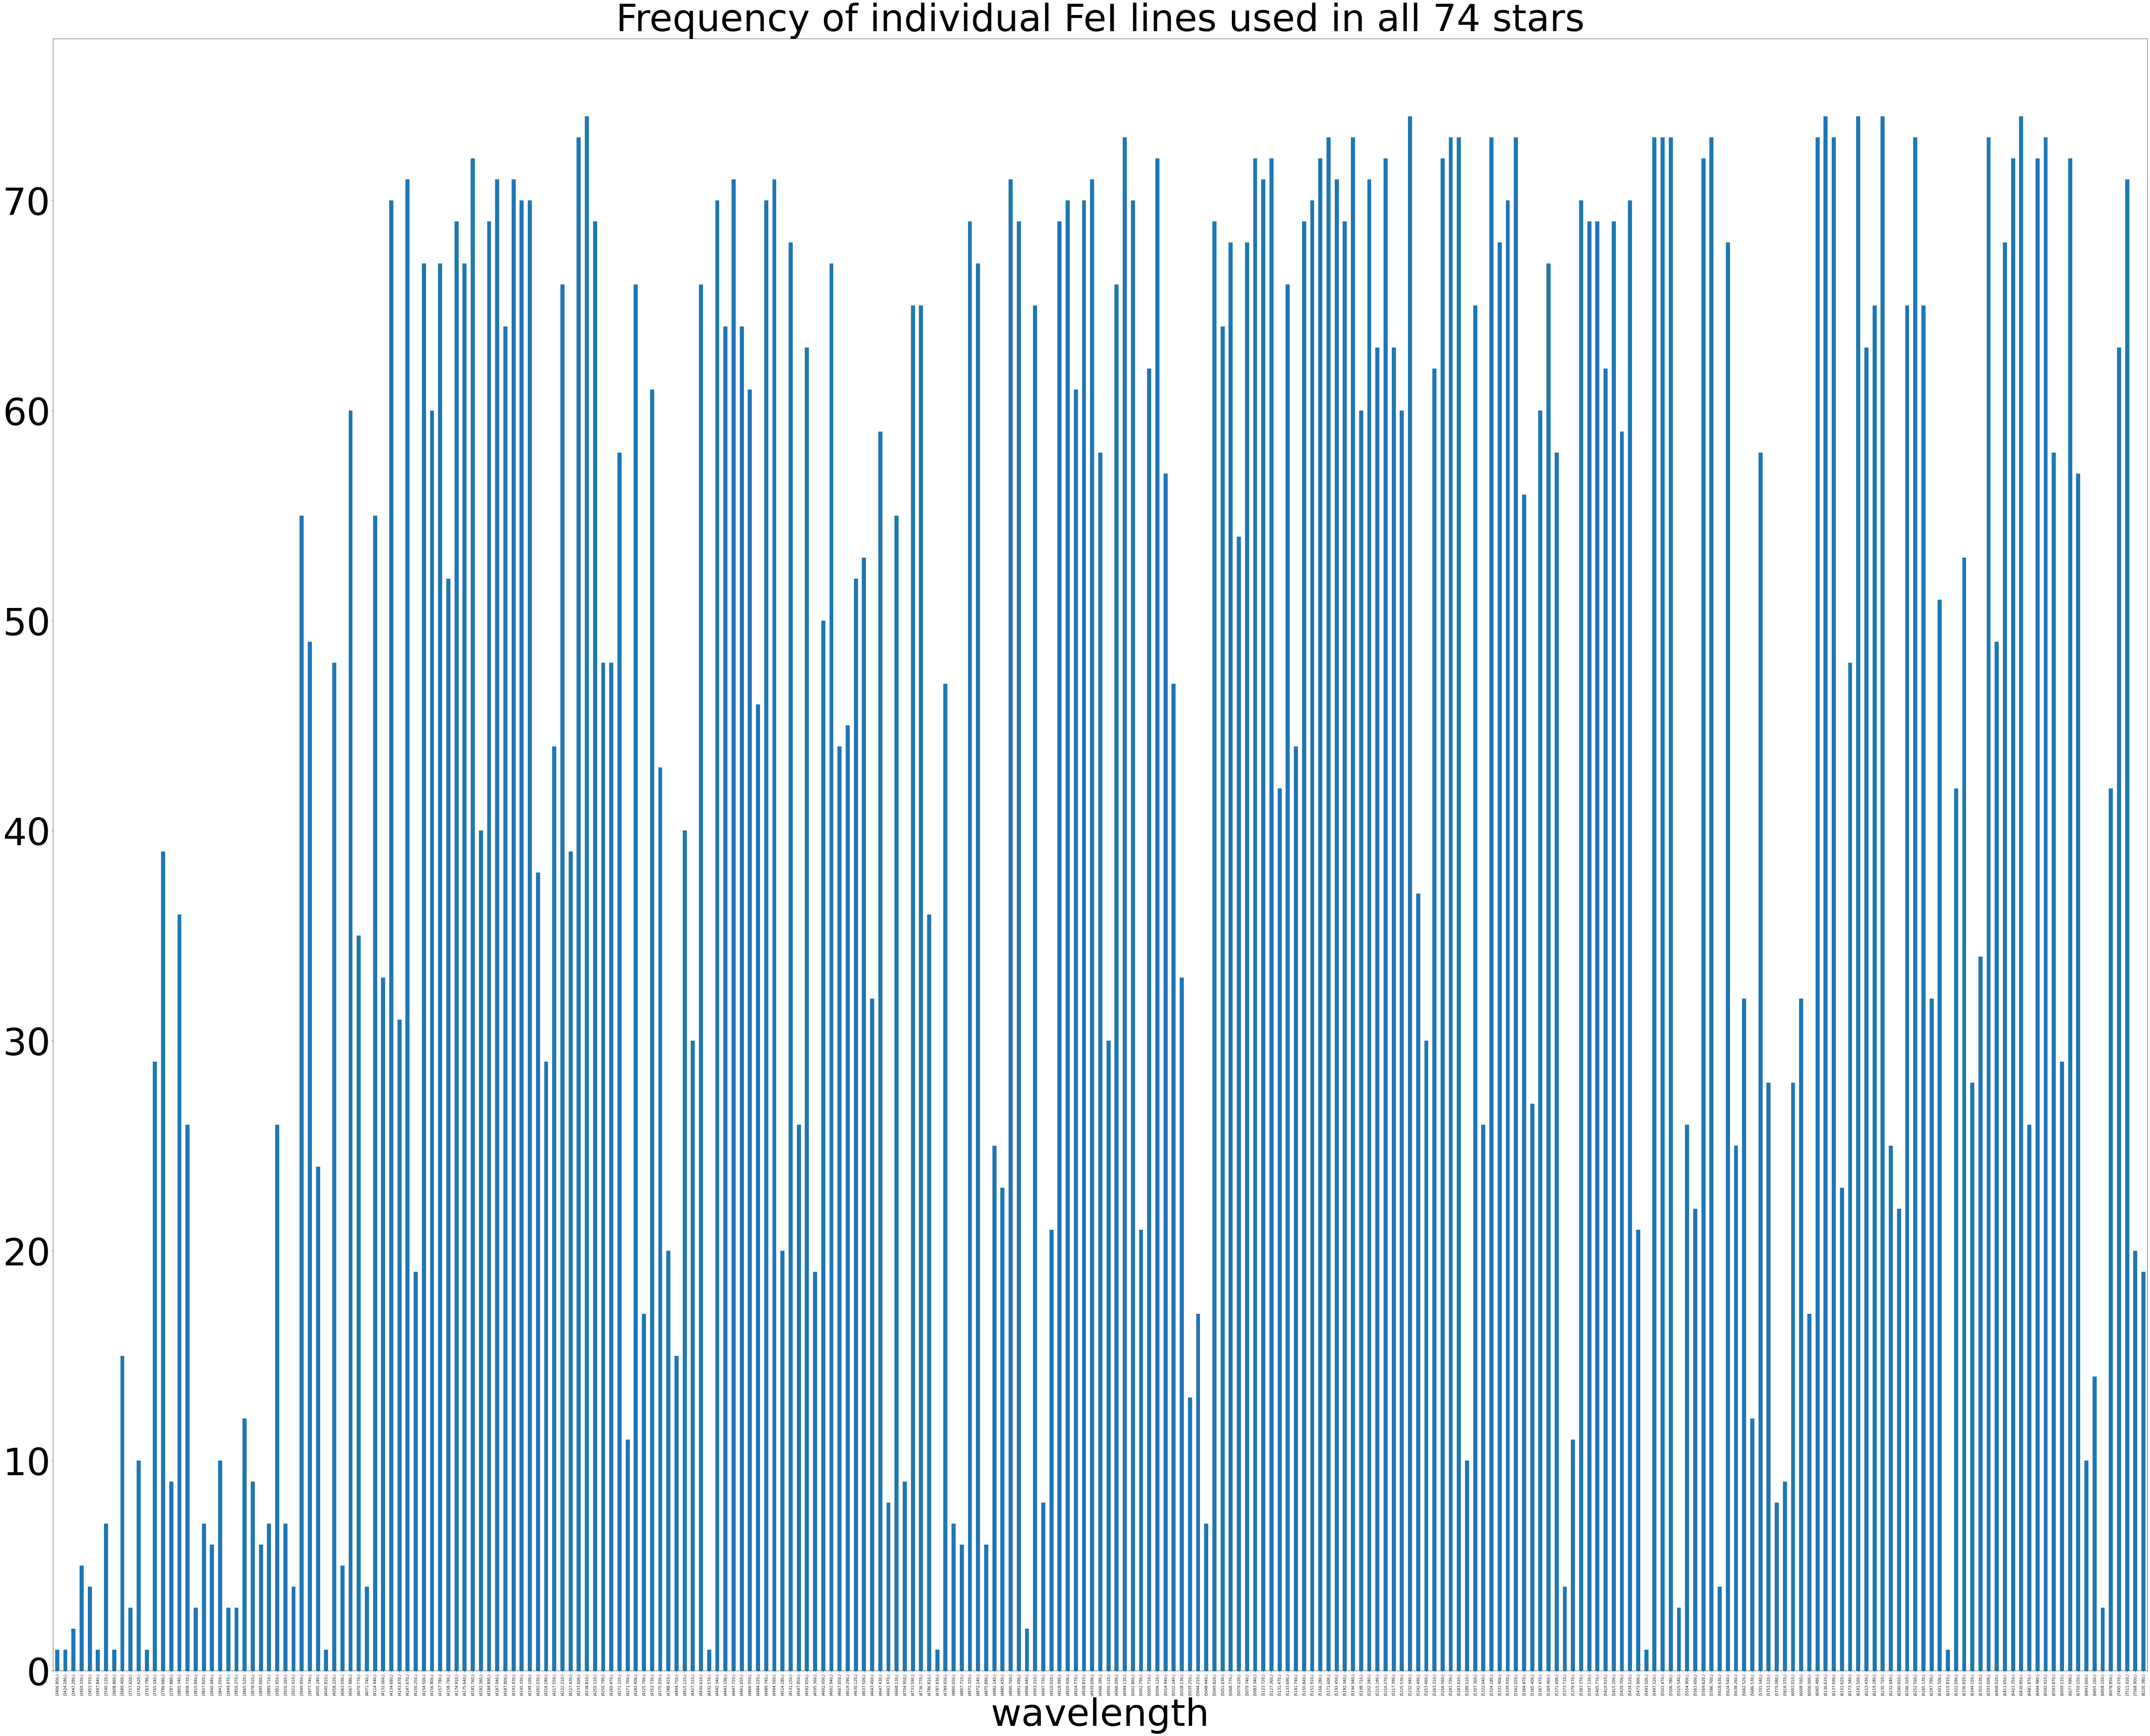

In [30]:
fig, ax = plt.subplots(figsize=[100,80])
ax.tick_params(axis='y', which='major', labelsize=100)
ax.tick_params(axis='y', which='minor', labelsize=80)
ax.set_title('Frequency of individual FeI lines used in all 74 stars', fontsize=100)
ax.set_xlabel('wavelength', fontsize=100)
smss_lines_fei_stat_sorted.plot(kind='bar',ax=ax)
fig.savefig('freq_fei.pdf')

In [92]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(smss_lines_fei_stat.rename('frequency'))

wavelength
6430.850      74
4238.810      74
6136.610      74
6230.720      74
5232.940      74
6191.560      74
4233.600      73
5283.620      73
6252.560      73
6137.690      73
6065.480      73
5586.760      73
5501.470      73
5497.520      73
6393.600      73
5324.180      73
5341.020      73
5281.790      73
6592.910      73
4994.130      73
5194.940      73
5171.600      73
5506.780      73
5127.360      72
5166.280      72
5266.560      72
5569.620      72
4181.760      72
5216.270      72
5083.340      72
5006.120      72
6421.350      72
6494.980      72
6677.990      72
5191.450      71
4447.720      71
4147.670      71
4191.430      71
4890.760      71
5202.340      71
4939.690      71
4494.560      71
5123.720      71
7511.020      71
4187.040      71
4199.100      70
4195.330      70
5151.910      70
5001.860      70
4134.680      70
4938.810      70
5339.930      70
4920.500      70
5383.370      70
5434.520      70
4489.740      70
4442.340      70
5405.770      69
519

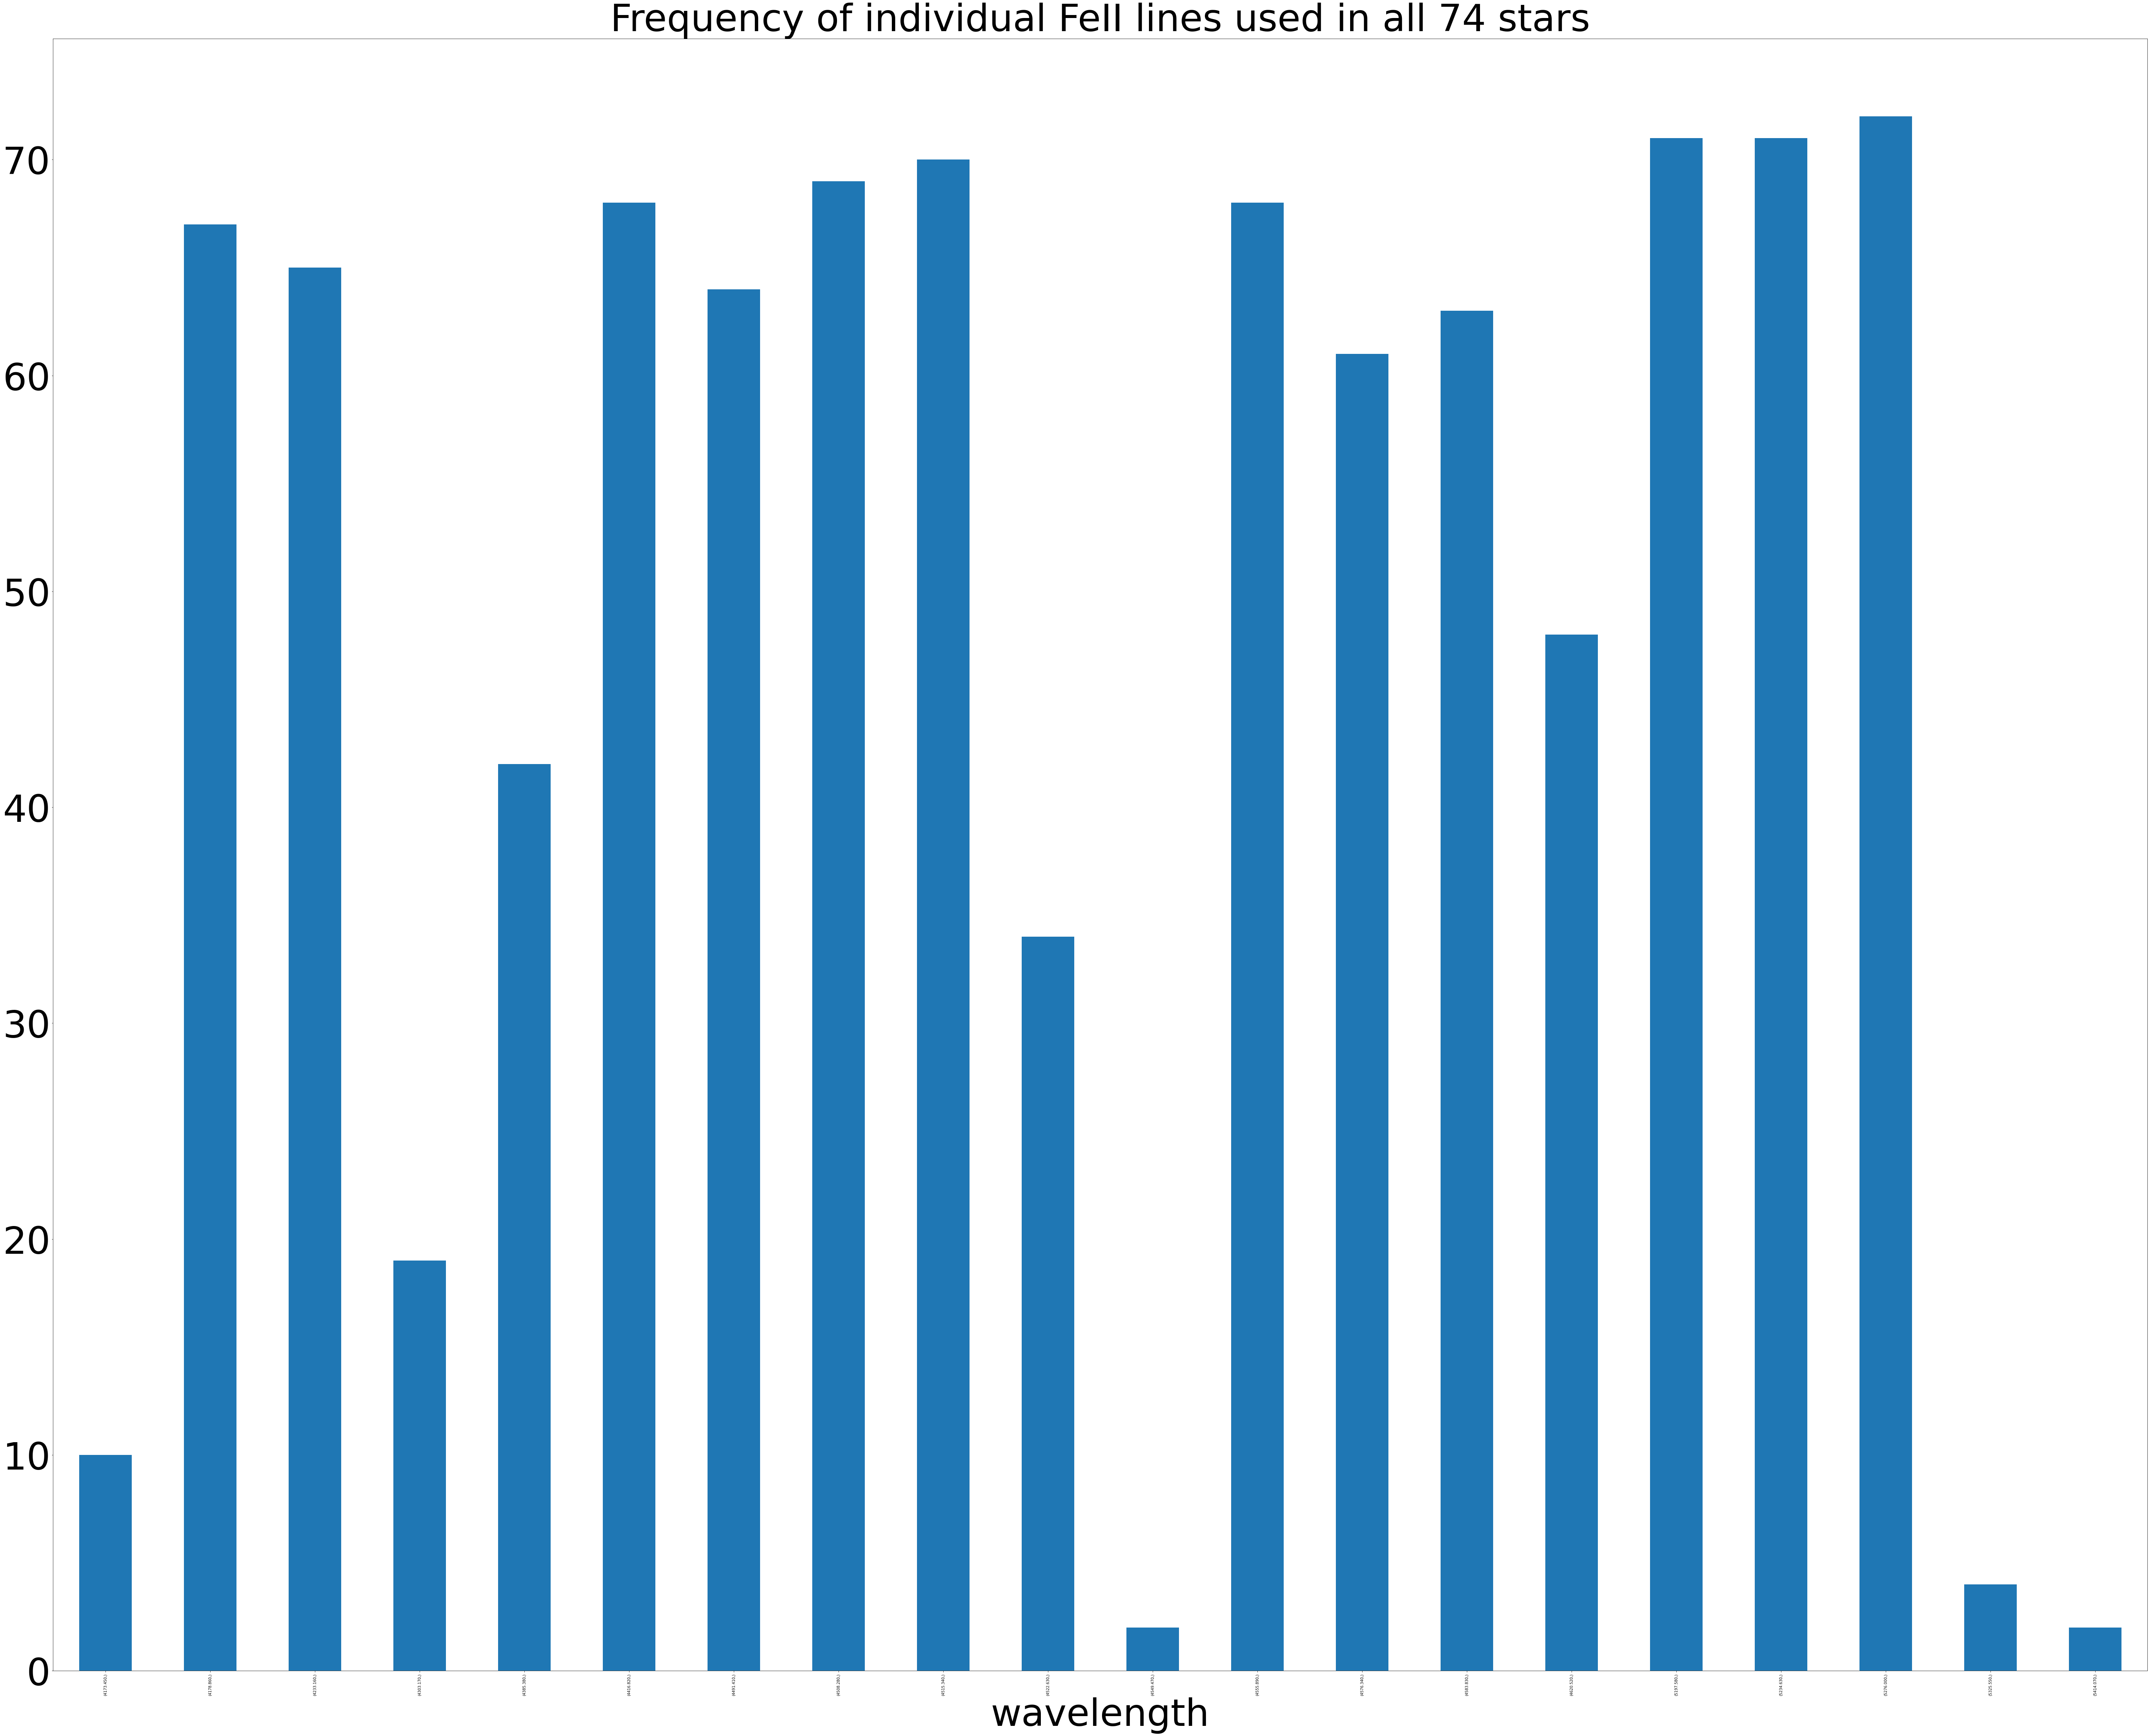

In [31]:
fig, ax = plt.subplots(figsize=[100,80])
ax.tick_params(axis='y', which='major', labelsize=100)
ax.tick_params(axis='y', which='minor', labelsize=80)
ax.set_title('Frequency of individual FeII lines used in all 74 stars', fontsize=100)
ax.set_xlabel('wavelength', fontsize=100)
smss_lines_feii_stat_sorted.plot(kind='bar',ax=ax)
fig.savefig('freq_feii.pdf')

In [24]:
# Import the stellar parameters
file_name = "../data/stellar_param_summary.csv"
stellar_param_all = pd.read_csv(file_name)

# Remove the ones we don't want
stellar_param_all = stellar_param_all.drop([10,18,19,21,37,40,53])

74


Text(0.5, 1.0, 'Temperature distribution of all 74 stars')

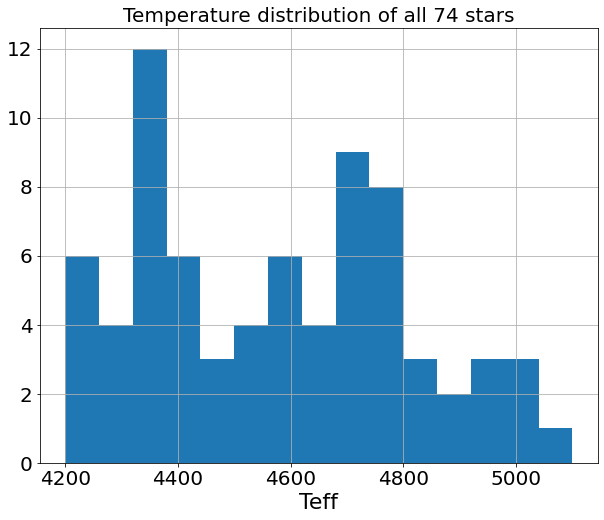

In [27]:
# Plot the distribution of the stellar parameters
fig, ax = plt.subplots(figsize=[10,8])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Teff', fontsize=22)
stellar_param_all.hist(column='teff',bins=15,ax=ax)
ax.set_title('Temperature distribution of all 74 stars', fontsize=20)

Text(0.5, 1.0, 'Surface graivity distribution of all 74 stars')

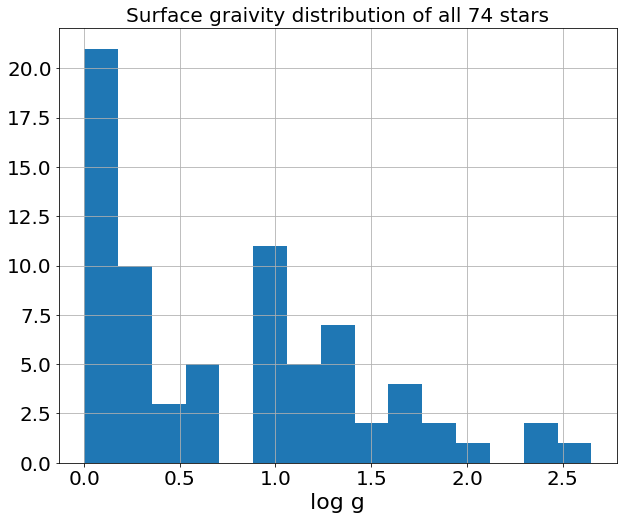

In [28]:
fig, ax = plt.subplots(figsize=[10,8])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('log g', fontsize=22)
stellar_param_all.hist(column='logg',bins=15,ax=ax)
ax.set_title('Surface graivity distribution of all 74 stars', fontsize=20)

Text(0.5, 1.0, 'Metallicity distribution of all 74 stars')

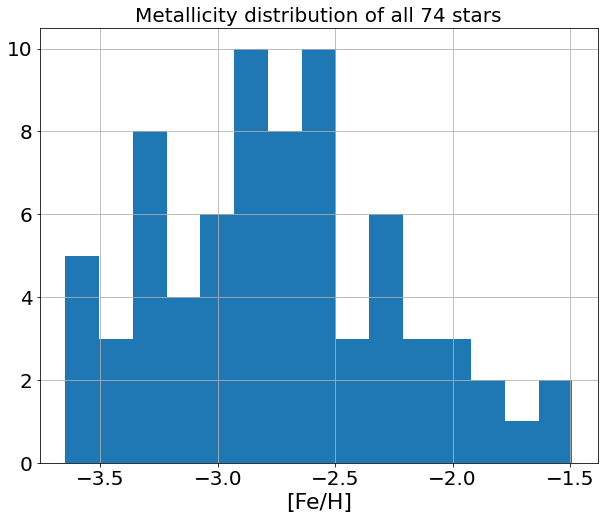

In [29]:
fig, ax = plt.subplots(figsize=[10,8])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('[Fe/H]', fontsize=22)
stellar_param_all.hist(column='fe_h',bins=15,ax=ax)
ax.set_title('Metallicity distribution of all 74 stars', fontsize=20)